<a href="https://colab.research.google.com/github/benku123/Machine_leraning_Concepts/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#logistic Regression (ML)

###x = ['income', 'region', 'education_level']
###y = ['gender']

<p>here data set about income and walfare in Korea. I want to see if a persons gender can affect how much they earn, is there a relationships. This can help us learn more about how fair income distribution is between different genders in Korer</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

import seaborn as sns
from sklearn.metrics import f1_score

year study conducted from 2005 to wave 14th in 2018
<ul>
<li>region: 1) Seoul 2) Kyeong-gi 3) Kyoung-nam 4) Kyoung-buk 5) Chung-nam 6) Gang-won &. Chung-buk 7) Jeolla & Jeju</li>
<li>income: yearly income in M KRW(Million Korean Won. 1100 KRW = 1 USD)</li>
<li>gender: 1) male 2) female</li>
<li>education_level: 1) no education(under 7 yrs-old) 2) no education(7 & over 7 yrs-old) 3) elementary 4) middle school 5) high school 6) college 7) university degree 8) MA 9) doctoral degree</li>
</ul>

<a href='https://www.kaggle.com/datasets/hongsean/korea-income-and-welfare'>Click here to find on kaggle</a>

In [ ]:
#read Excel file into a DataFrame
df = pd.read_csv("/content/sample_data/Korea Income and Welfare.csv")
df.head()


,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [ ]:
df.describe()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion
count,9.285700e+04,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000
mean,4.365181e+07,2011.517958,7.517958,3.691353,3441.122327,2.484304,1.296316,1952.956740,4.511895,1.679389,1.499521
std,2.619007e+07,4.011222,4.011222,2.058961,4176.324522,1.292251,0.456634,16.006065,1.669887,1.103413,0.531572
min,1.010100e+04,2005.000000,1.000000,1.000000,-232174.000000,1.000000,1.000000,1910.000000,2.000000,0.000000,1.000000
25%,2.177120e+07,2008.000000,4.000000,2.000000,1140.000000,1.000000,1.000000,1939.000000,3.000000,1.000000,1.000000
50%,4.322010e+07,2012.000000,8.000000,3.000000,2428.000000,2.000000,1.000000,1952.000000,5.000000,1.000000,1.000000
75%,6.190030e+07,2015.000000,11.000000,5.000000,4695.000000,3.000000,2.000000,1966.000000,5.000000,2.000000,2.000000
max,9.800070e+07,2018.000000,14.000000,7.000000,468209.000000,9.000000,2.000000,2002.000000,9.000000,9.000000,9.000000


In [ ]:
#correcting dataset, 1 to 0:False and 2 to 1:True
df = df.dropna(subset=['gender'])
print(df['gender'].unique())
df['gender'] = df['gender'].map({1: 0, 2: 1}) #change to boolean variable

[2 1]


In [ ]:
# 70% for training, 15% for cross-validation, and 15% for testing
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
cv_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

X_train = train_df[['income', 'region', 'education_level']]
Y_train = train_df['gender']

X_cv = cv_df[['income', 'region', 'education_level']]
Y_cv = cv_df['gender']

In [ ]:
#Training model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#w and y values
print(f"w = {model.coef_}")
print(f"y = {model.intercept_}")

w = [[-3.54711761e-04 -6.26502982e-02 -4.69347611e-01]]
y = [2.21601295]


F1 score (model 1):  0.5974736293788254
Accuracy:  0.7780888793165338
Confusion Matrix: 
 [[8544 1177]
 [1914 2294]]


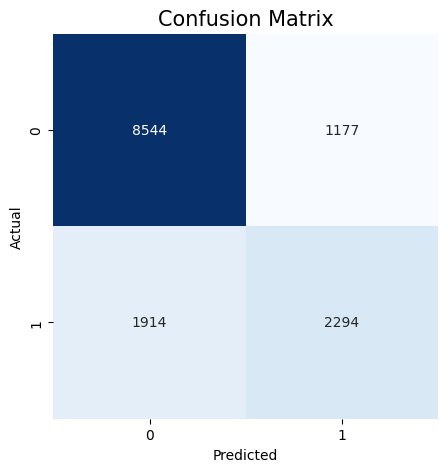

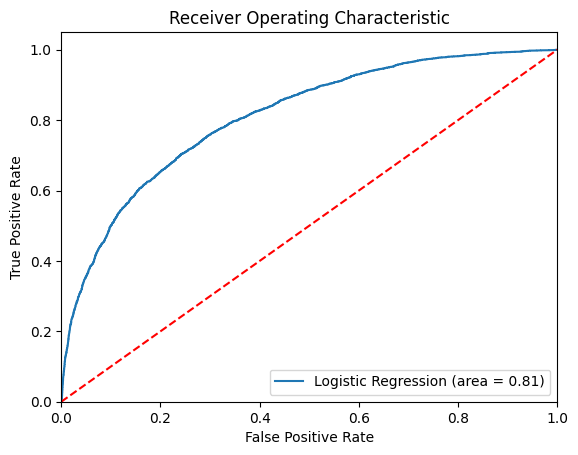

In [ ]:
#evaluating model
predictions_cv = model.predict(X_cv)

f1_model1 = f1_score(Y_cv, predictions_cv)
print('F1 score (model 1): ', f1_model1)


accuracy = accuracy_score(Y_cv, predictions_cv)
print('Accuracy: ', accuracy)

cm = confusion_matrix(Y_cv, predictions_cv)
print('Confusion Matrix: \n', cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, square=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix', size = 15)

# ROC curve
probs = model.predict_proba(X_cv)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_cv, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#initial parameters
w = np.zeros(3)
m = len(df)
alpha = 0.01

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def h(w, x):
    z = np.dot(x, w)
    return sigmoid(z)

#cost function
def cost(w, x, y):
    epsilon = 1e-5
    h_val = h(w, x)
    h_val = np.clip(h_val, epsilon, 1 - epsilon)  # clip predictions to avoid log(0)
    total_cost = -np.sum(y * np.log(h_val) + (1 - y) * np.log(1 - h_val))
    return total_cost / m

#gradient descent
def gradient_descent(w, x, y, num_iter):
    for i in range(num_iter):
        predicted_sub_actual = h(w, x) - y
        w = w - alpha * np.dot(x.T, predicted_sub_actual) / m
        if i % 100 == 0:
            print(f"epoch: {i} j(w) = {cost(w, x, y)} | w = {w}")
    return w

x = train_df[['income', 'region', 'education_level']].values
y = train_df['gender'].values

#normalize features
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

w = gradient_descent(w, x, y, 1001)

epoch: 0 j(w) = 0.4849418726538594 | w = [-0.0008457   0.00012444 -0.00134786]
epoch: 100 j(w) = 0.46459080110664647 | w = [-0.07549044  0.00934179 -0.12230467]
epoch: 200 j(w) = 0.4513930024945504 | w = [-0.13559484  0.01351585 -0.21994018]
epoch: 300 j(w) = 0.4426160564062989 | w = [-0.18513289  0.01424002 -0.29932432]
epoch: 400 j(w) = 0.43664715720738795 | w = [-0.22661441  0.01265345 -0.36436577]
epoch: 500 j(w) = 0.4324899932106599 | w = [-0.26182036  0.00955619 -0.41803828]
epoch: 600 j(w) = 0.4295516222353756 | w = [-0.29204882  0.00550766 -0.46260752]
epoch: 700 j(w) = 0.4274407832295954 | w = [-0.31826643  0.00089915 -0.49981448]
epoch: 800 j(w) = 0.42590225578749413 | w = [-0.34120714 -0.00399556 -0.53101207]
epoch: 900 j(w) = 0.42476608202339755 | w = [-0.36143798 -0.00898527 -0.55726398]
epoch: 1000 j(w) = 0.42391693652669554 | w = [-0.37940393 -0.01393739 -0.57941608]


In [ ]:
# predict function
def predict(w, x):
    prob = h(w, x)
    return prob >= 0.5  # returns a boolean array

# normalize cv data
x_cv = X_cv.values
x_cv = (x_cv - np.mean(x_cv, axis=0)) / np.std(x_cv, axis=0)
predictions_cv = predict(w, x_cv)



f1_model2 = f1_score(Y_cv, predictions_cv)
print('F1 score (model 2): ', f1_model2)

# calculate accuracy
accuracy = accuracy_score(Y_cv, predictions_cv)
print('Accuracy: ', accuracy)


F1 score (model 2):  0.5995635093845482
Accuracy:  0.670687055782899
